## Car Price Prediction Analysis
### Linear Regression-based project with Scikit-learn
This dataset contains information about used cars. This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.

In [138]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt   
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [69]:
#Load the dataset
cars_data = pd.read_csv('car data.csv')
cars_data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [70]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [71]:
cars_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [72]:
cars_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [77]:
print(cars_data['Fuel_Type'].value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


In [78]:
fuel_type = cars_data['Fuel_Type']
seller_type = cars_data['Seller_Type']
transmission_type = cars_data['Transmission']
selling_price = cars_data['Selling_Price']

### NOTE
The values for the below figures are **max** values of the corresponding feature. An example table is given below the graphs for diesel. Notice that this feature on the graph is above 8 and the max value in the table is 8.15

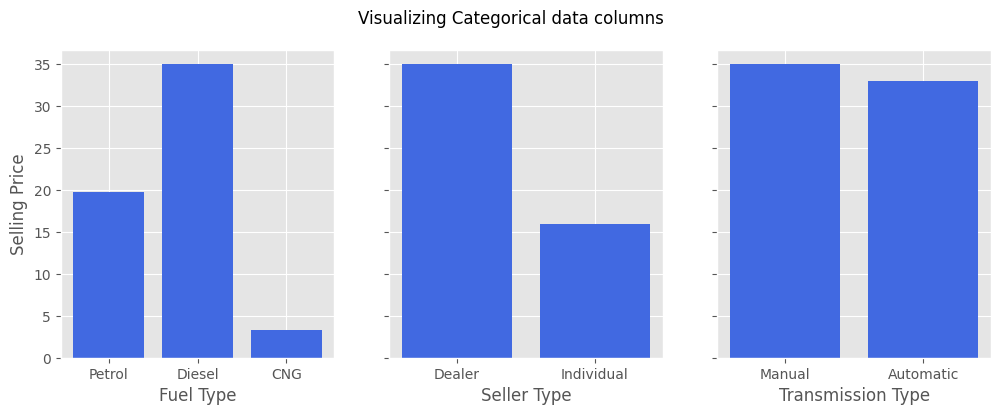

In [79]:
plt.style.use('ggplot')
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,4), sharey=True)
fig.suptitle("Visualizing Categorical data columns")
ax1.set_ylabel('Selling Price')
ax1.bar(fuel_type, selling_price, color='royalblue')
ax1.set_xlabel('Fuel Type')
ax2.bar(seller_type, selling_price, color='royalblue')
ax2.set_xlabel('Seller Type')
ax3.bar(transmission_type, selling_price, color='royalblue')
ax3.set_xlabel('Transmission Type')
plt.show()

In [80]:
cars_data.groupby("Fuel_Type").get_group('Diesel').describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,60.000000,60.000000,60.000000,60.000000,60.000000
mean,2014.000000,10.278500,15.814500,50369.916667,0.016667
std,2.201694,7.185159,13.484289,30021.446979,0.129099
min,2005.000000,3.100000,5.700000,2071.000000,0.000000
25%,2013.000000,5.137500,8.912500,38750.000000,0.000000
50%,2014.000000,7.750000,10.585000,45000.000000,0.000000
75%,2015.000000,12.600000,17.010000,59250.000000,0.000000
max,2018.000000,35.000000,92.600000,197176.000000,1.000000


### Converting categorical data into numerical 
To train the regression model we need numerical data. Therefore we need to convert our categories into numerical forms
There are to ways to do it.
1) Hard code variation
2) One Hot variation

In [81]:
# Hard code encoding
cars_data.replace({'Fuel_Type' : {'Petrol' : 0, 'Diesel':1, 'CNG':2, 'LPG':3, 'Electric':4}}, inplace=True)

# One Hot encoding
cars_data = pd.get_dummies(cars_data, columns=['Seller_Type', 'Transmission'], drop_first = True)

In [82]:
cars_data.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Owner,Seller_Type_Individual,Transmission_Manual
296,city,2016,9.50,11.6,33988,1,0,0,1
297,brio,2015,4.00,5.9,60000,0,0,0,1
298,city,2009,3.35,11.0,87934,0,0,0,1
299,city,2017,11.50,12.5,9000,1,0,0,1
300,brio,2016,5.30,5.9,5464,0,0,0,1


C:\Users\Nifdi Guliyev\AppData\Local\Temp\ipykernel_2380\1046742725.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cars_data.corr(), annot=True)


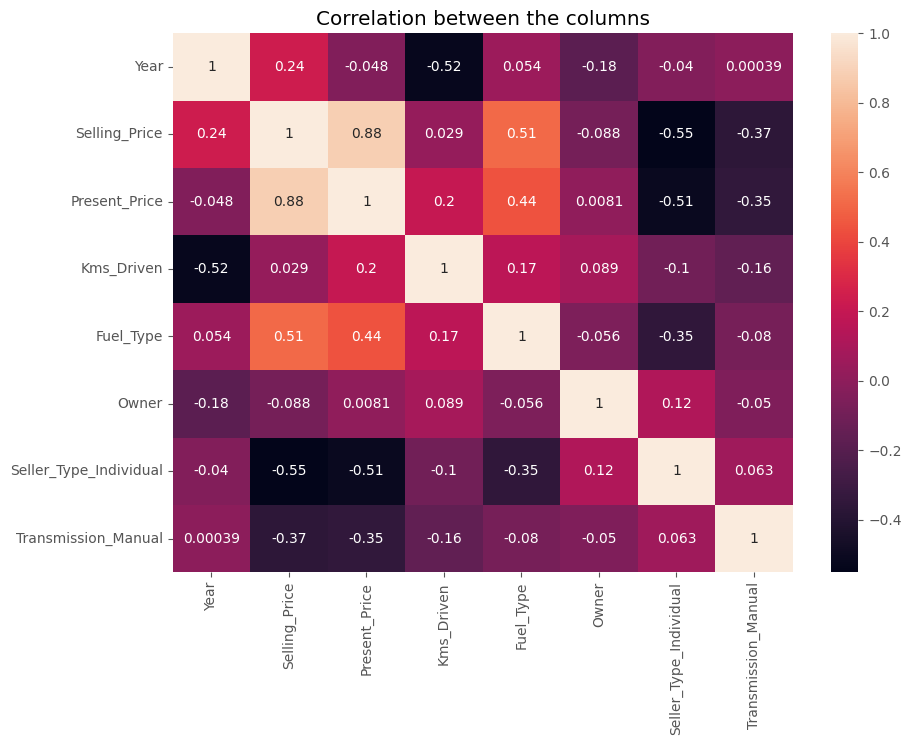

In [84]:
plt.figure(figsize=(10,7))
sns.heatmap(cars_data.corr(), annot=True)
plt.title('Correlation between the columns')
plt.show()

<AxesSubplot: title={'center': 'Correlation between year and the selling price'}, xlabel='Present_Price', ylabel='Selling_Price'>

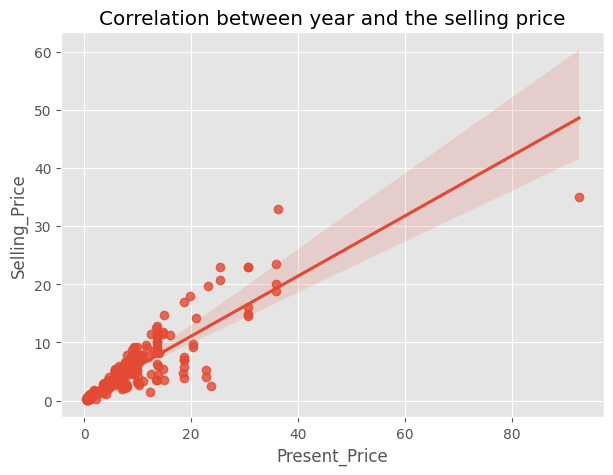

In [85]:
fig = plt.figure(figsize=(7,5))
plt.title('Correlation between year and the selling price')
sns.regplot(x='Present_Price', y='Selling_Price', data=cars_data)

### Traning
It is visible from heatmap that Selling price has the most correlation with the Present price. Now we need to start training the data. The model that we will use is Linear Regression

In [112]:
X = cars_data.drop(['Car_Name','Selling_Price'], axis=1)
y = cars_data['Selling_Price']

In [113]:
print(X.shape)
print(y.shape)

(301, 7)
(301,)


In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [115]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(210, 7)
(91, 7)
(210,)
(91,)


In [116]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [117]:
linear_regression_model = LinearRegression()

In [118]:
linear_regression_model.fit(X_train, y_train)

LinearRegression()

In [119]:
prediction = linear_regression_model.predict(X_test)

In [120]:
print("MAE: ", (mean_absolute_error(prediction, y_test)))
print("MSE: ", (mean_squared_error(prediction, y_test)))
print("R2 score: ", (r2_score(prediction, y_test)))

MAE:  1.2581404706473376
MSE:  3.4932860262251517
R2 score:  0.829493336977881


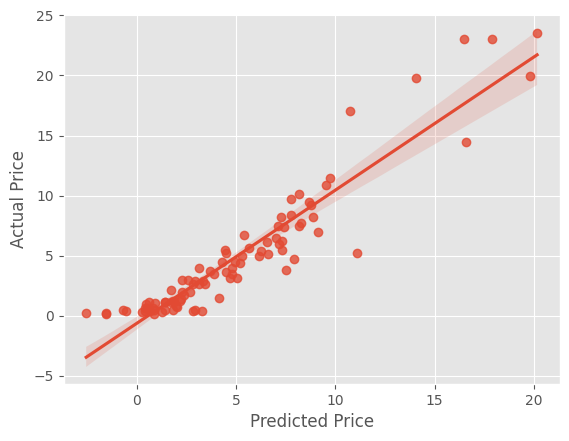

In [126]:
sns.regplot(x=prediction, y=y_test)
plt.ylabel('Actual Price')
plt.xlabel('Predicted Price')
plt.show()